In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the datasets
F1 = 'Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv'
F2 = 'Unemployment in India - Unemployment in India.csv'

unemployment_rate_df = pd.read_csv(F1)
unemployment_india_df = pd.read_csv(F2)

In [41]:
unemployment_rate_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [7]:
unemployment_india_df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [9]:
# Convert the 'Date' columns to datetime format
unemployment_rate_df['Date'] = pd.to_datetime(unemployment_rate_df['Date'], format='%d-%m-%Y')
unemployment_india_df['Date'] = pd.to_datetime(unemployment_india_df['Date'], format='%d-%m-%Y')


In [13]:
# Remove duplicates and handle missing values in the second dataset
unemployment_india_df_cleaned = unemployment_india_df.drop_duplicates().dropna()
unemployment_india_df_cleaned

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


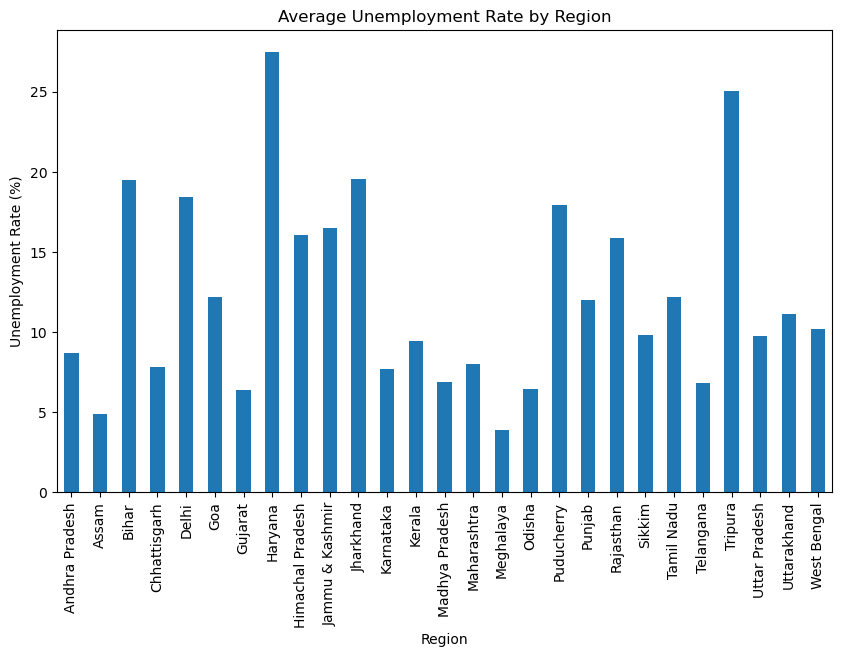

In [19]:
unemployment_rate_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Unemployment Rate by Region')
plt.ylabel('Unemployment Rate (%)')
plt.show()

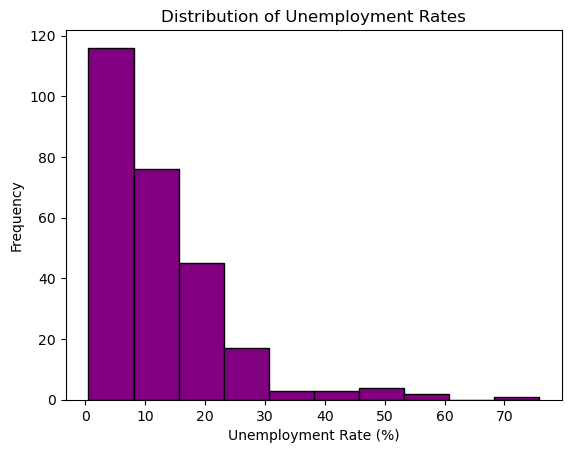

In [23]:
plt.hist(unemployment_rate_df['Estimated Unemployment Rate (%)'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

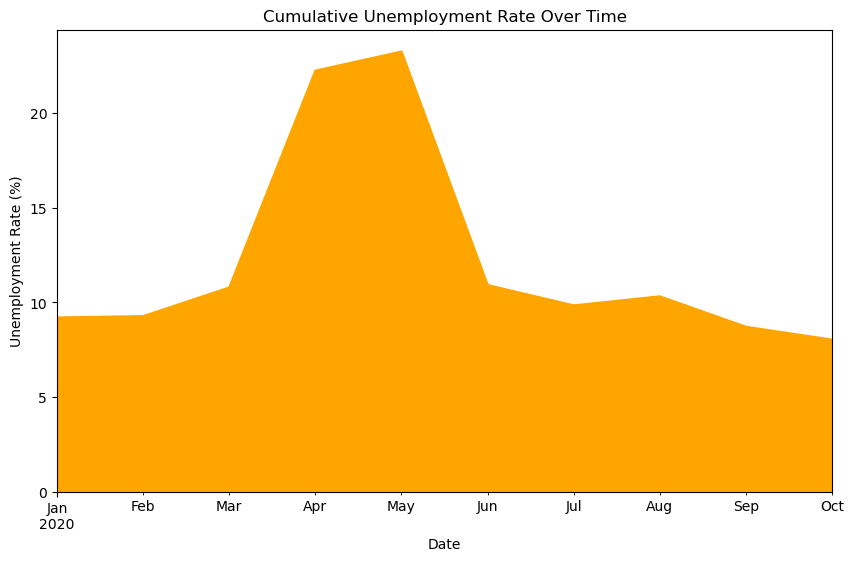

In [25]:
unemployment_rate_df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().plot(kind='area', figsize=(10, 6), color='orange')
plt.title('Cumulative Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate (%)')
plt.show()

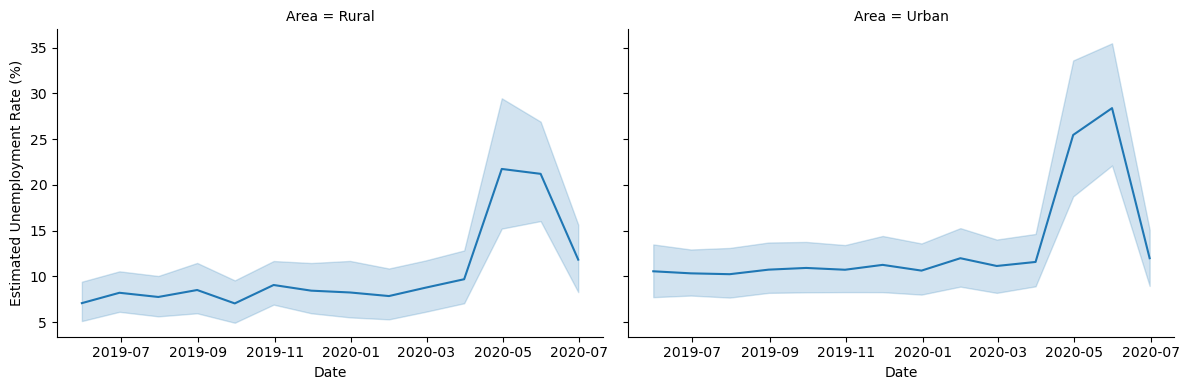

In [31]:
g = sns.FacetGrid(unemployment_india_df_cleaned, col='Area', height=4, aspect=1.5)
g.map(sns.lineplot, 'Date', 'Estimated Unemployment Rate (%)')
plt.show()

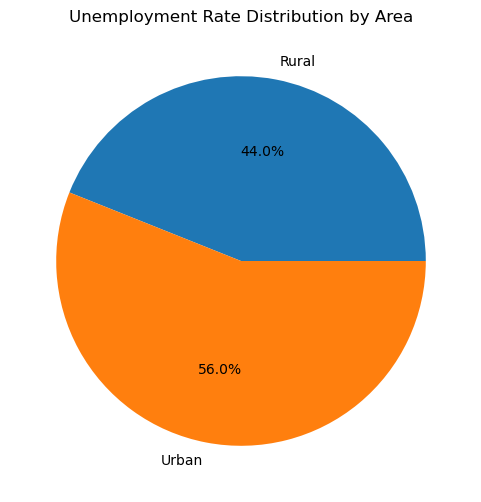

In [37]:
unemployment_india_df_cleaned.groupby('Area')['Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Unemployment Rate Distribution by Area')
plt.ylabel('')
plt.show()

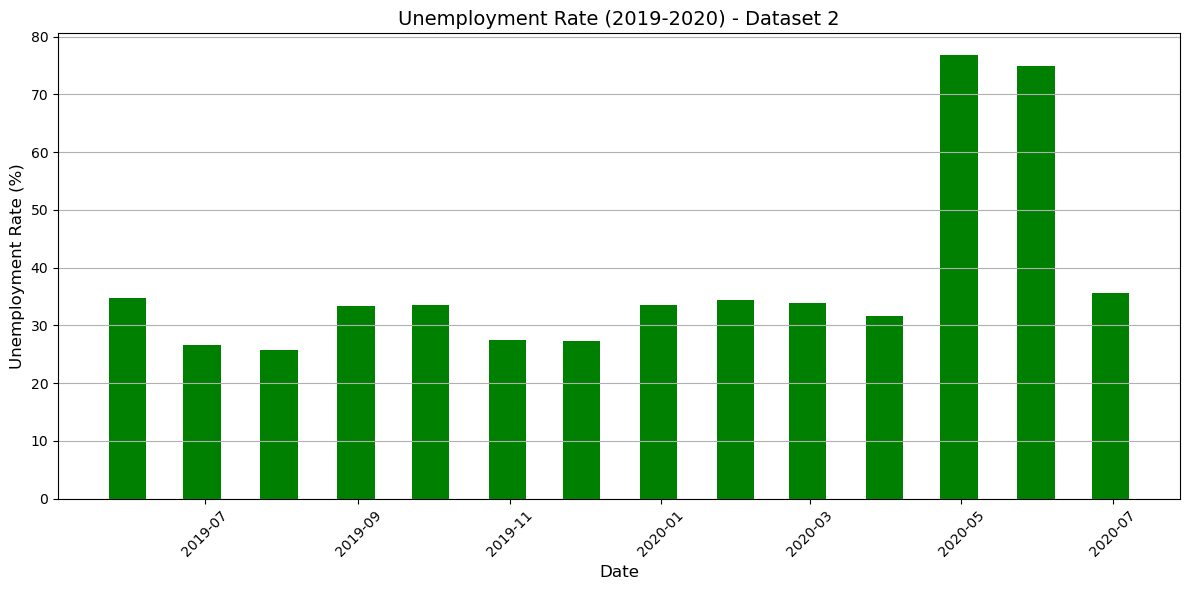

In [53]:
start_date = '2019-01-01'
end_date = '2020-12-31'
unemployment_india_df_cleaned_filtered = unemployment_india_df_cleaned[(unemployment_india_df_cleaned['Date'] >= start_date) & (unemployment_india_df_cleaned['Date'] <= end_date)]

# Bar plot for Dataset 2
plt.figure(figsize=(12, 6))
plt.bar(unemployment_india_df_cleaned_filtered['Date'], unemployment_india_df_cleaned_filtered['Estimated Unemployment Rate (%)'], width=15, color='green')

# Adding titles and labels
plt.title('Unemployment Rate (2019-2020) - Dataset 2', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()